In [2]:
!pip install qrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import os
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
import qrcode

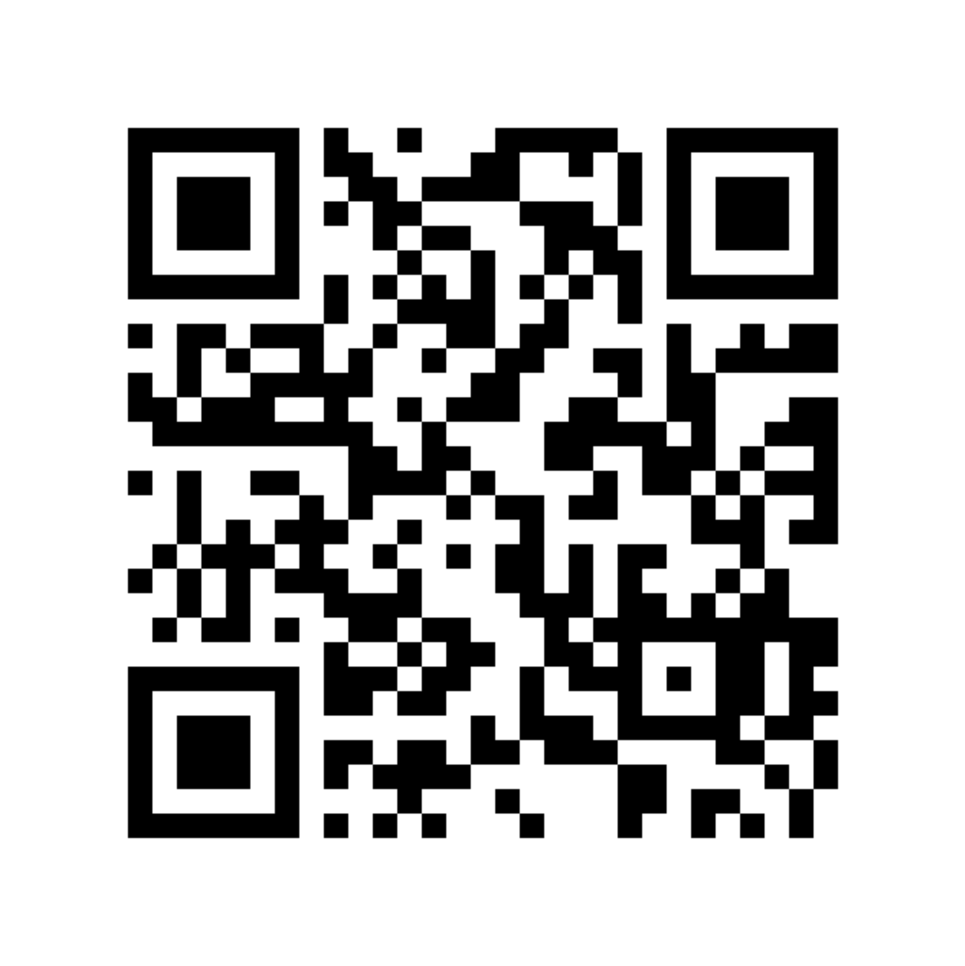

In [22]:
def make_qr_png(
    url: str,
    filename: Optional[os.PathLike] = 'qr_py.png',
    dpi: Optional[int] = 300,
    ) -> None:
  """Saves a png QR code to a URL with transparent whites and background.

  Parameters
  ----------
  url: url that the QR code should point to.
  filename: For saving.
  dpi: matplotlib figure dpi.
  """

  qr = qrcode.QRCode()
  qr.add_data(url)
  img = qr.make_image()

  # cast to numpy
  img = np.array(img)
  h, w = img.shape
  rgb = [img for _ in range(3)]
  rgb = np.stack(rgb, -1)
  alpha = np.zeros(rgb.shape[:2])

  # set alpha channel 
  rgba = np.zeros((h, w, 4))
  rgba[...,:3] = rgb
  rgba[...,-1] = (1 - np.max(rgba[...,:3], axis=-1))*255
  rgba = rgba.astype(int)

  # plot and save as png w/ alpha channel
  fig, ax = plt.subplots(1, 1, dpi=dpi)
  ax.imshow(rgba)
  ax.axis('off')
  fig.savefig(filename, transparent=True)

url = "doi.org/10.48550/arXiv.2301.11955"
make_qr_png(url)